In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D
from keras.layers.core import Flatten
from tensorflow.keras.optimizers import SGD
import cv2
import os
import numpy as np
import pandas as pd

In [2]:
data_path_1 = '/kaggle/input/myself1'
image_list_1 = []
data_path_0 = '/kaggle/input/myself0'
image_list_0 = []

for file_name_1 in os.listdir(data_path_1):
  img = cv2.imread(os.path.join(data_path_1, file_name_1))
  image_list_1.append(cv2.resize(img, (150, 150), interpolation = cv2.INTER_AREA))
    
for file_name_0 in os.listdir(data_path_0):
  img = cv2.imread(os.path.join(data_path_0, file_name_0))
  image_list_0.append(cv2.resize(img, (150, 150), interpolation = cv2.INTER_AREA))

image_list_1 = np.array(image_list_1)
print(image_list_1.shape)
image_list_0 = np.array(image_list_0)
print(image_list_0.shape)

(80, 150, 150, 3)
(20, 150, 150, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

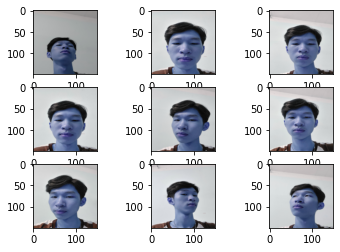

In [3]:
for i in range(9):
  plt.subplot(330 + i + 1)
  plt.imshow(image_list_1[i])
plt.show

In [4]:
y = []

for i in range(len(image_list_1)):
    y.append(1)
for i in range(len(image_list_0)):
    y.append(0)
y = np.array(y)
print(y.shape)
print(y)

(100,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [5]:
X_train = []
X_test = []

for img in image_list_1[:70]:
    X_train.append(img)

for img in image_list_0[-10:]:
    X_train.append(img)

for img in image_list_1[70:]:
    X_test.append(img)

for img in image_list_0[:10]:
    X_test.append(img)

X_train = np.array(X_train)
X_test = np.array(X_test)
print(X_train.shape)
print(X_test.shape)

(80, 150, 150, 3)
(20, 150, 150, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

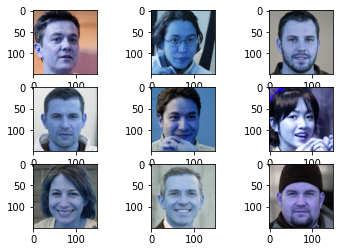

In [6]:
for i in range(9):
  plt.subplot(330 + i + 1)
  plt.imshow(X_test[10+i])
plt.show

In [7]:
y_train = []
y_test = []

for img in y[:70]:
    y_train.append(img)

for img in y[-10:]:
    y_train.append(img)

for img in y[70:90]:
    y_test.append(img)

y_train = np.array(y_train)
y_test = np.array(y_test)
print(y_train.shape)
print(y_test.shape)

(80,)
(20,)


In [8]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)
X = X_test

[1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1]


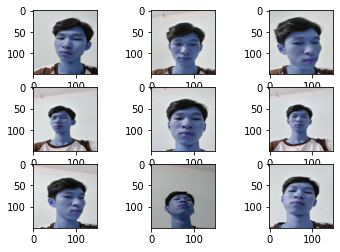

In [9]:
for i in range(9):
  plt.subplot(330 + i + 1)
  plt.imshow(X_train[i+20])
plt.show
print(y_train)

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 150, 150, 3)
(20, 150, 150, 3)
(80, 2)
(20, 2)


In [11]:
model = Sequential([
    layers.RandomFlip(("horizontal"), input_shape = (150, 150, 3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.5),
])
model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same', input_shape = (150, 150, 3)))
model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding= 'same', input_shape = (150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation = 'softmax'))

2022-05-18 03:46:45.307829: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 03:46:45.440672: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 03:46:45.441418: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 03:46:45.442924: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [12]:
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
history = model.fit(X_train, y_train, epochs = 50, batch_size=64, validation_data=(X_test, y_test), verbose= 1)

2022-05-18 03:46:48.504524: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-05-18 03:46:50.433258: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2/2 [==============================] - 9s 653ms/step - loss: 24085952.0000 - accuracy: 0.7000 - val_loss: 547679994625669255892303872.0000 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 0s 44ms/step - loss: 325424923837589910805226163368099840.0000 - accuracy: 0.7250 - val_loss: nan - val_accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 0s 42ms/step - loss: 8100585472.0000 - accuracy: 0.8750 - val_loss: nan - val_accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 0s 40ms/step - loss: 21633710080.0000 - accuracy: 0.8750 - val_loss: nan - val_accuracy: 0.5000
Epoch 5/50
2/2 [==============================] - 0s 41ms/step - loss: 19944112128.0000 - accuracy: 0.8750 - val_loss: nan - val_accuracy: 0.5000
Epoch 6/50
2/2 [==============================] - 0s 42ms/step - loss: 0.6436 - accuracy: 0.8750 - val_loss: nan - val_accuracy: 0.5000
Epoch 7/50
2/2 [==============================] - 0s 43ms/step - loss: 0.6339 - accuracy: 0.87

In [14]:
score = model.evaluate(X_test, y_test, verbose = 1)

1/1 [==============================] - 0s 21ms/step - loss: nan - accuracy: 0.5000


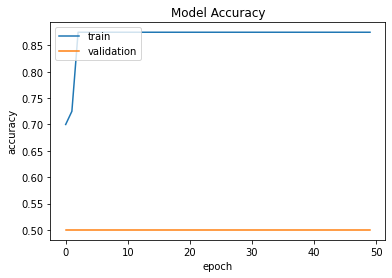

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')

In [16]:
y_pred = model.predict(X_test)

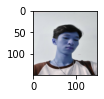

[nan nan]


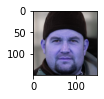

[nan nan]


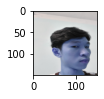

[nan nan]


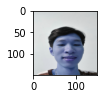

[nan nan]


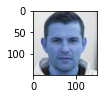

[nan nan]


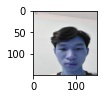

[nan nan]


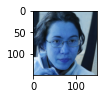

[nan nan]


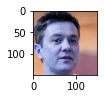

[nan nan]


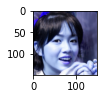

[nan nan]


In [17]:
for i in range(9):
  plt.subplot(330 + i +1)
  plt.imshow(X[i+10])
  plt.show()  
  print(np.round(y_pred[i+10]))